In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
#Load the built in dataset
penguins = sns.load_dataset("penguins")

In [4]:
#Examine first 5 rows of the dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
# DATA CLEANING

#We will be focusing our analysis on Adelie and Gentoo penguins and dropping any missing values from the dataset
# the dropna() function by default removes any rows with any missing values in any of the columns. 
# The reset_index() function resets the index values for the rows in the dataframe. Typically, you use reset_index() after you've finished
# manipulating the dataset. By setting inplace=True, you will not create a new DataFrame object. By setting drop=True, you will not insert a 
# new index column into the DataFrame object.

penguins_sub = penguins[penguins['species'] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace = True, drop=True)

EDA - EXPLORATORY DATA ANALYSIS

Since this part of the course focuses on simple linear regression, you want to check for any linear relationships among variables in the dataframe. 
You can do this by creating scatterplots using any data visualization package, for example matplotlib.plt, seaborn, or plotly.

To visualize more than one relationship at the same time, we use the pairplot() function from the seaborn package to create a scatterplot matrix.

Scatterplot matrix : a series of scatterplots that show the relationships between pair of variables.

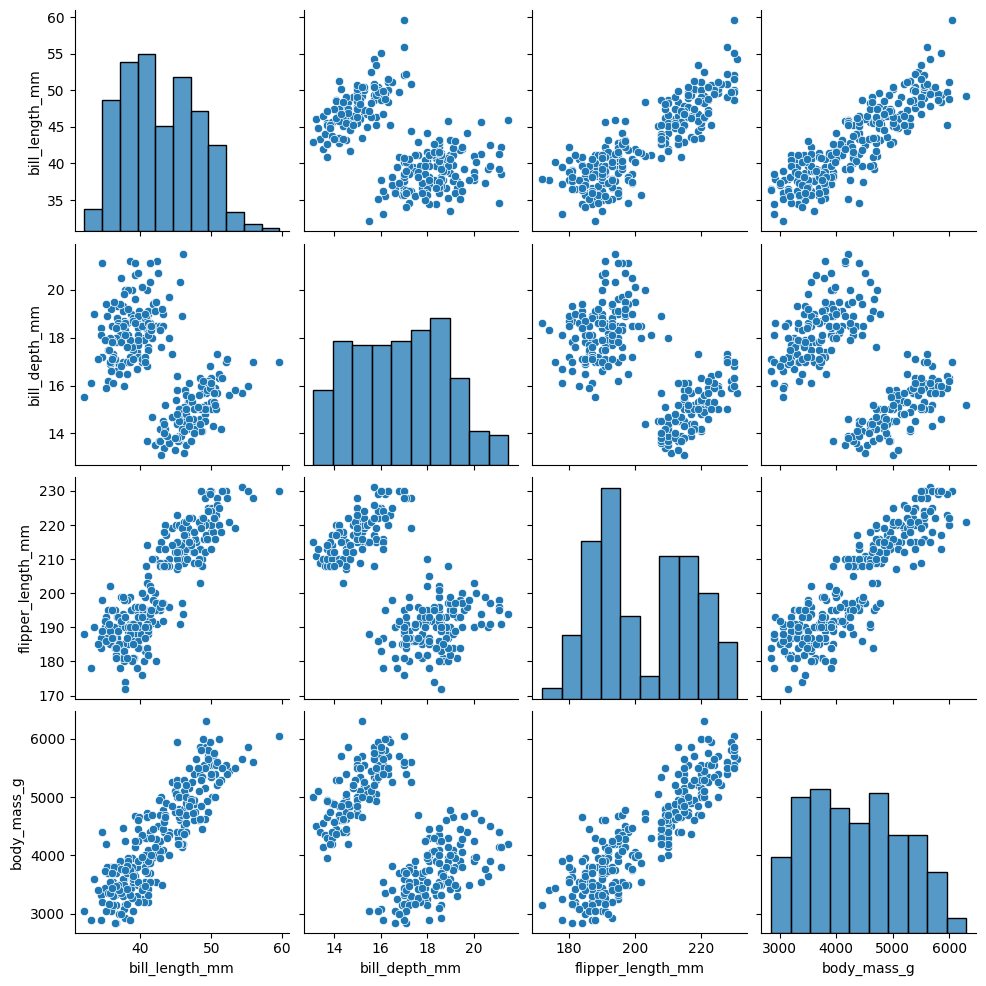

In [7]:
#Create pairwise scatterplot of dataset
sns.pairplot(penguins_final)

From the matrix we can observe a few linear relationships. The diagonal displays the distribution of the continuous variables.This reassures that
the data has met the linearity assumption for building a simple linear regression

1. bill_length_mm and body_mass_g seem to be positively correlated
2. bill_length_mm and flipper_length_mm seem to be positively correlated
3. bosy_mass_g and flipper_length_mm seem to be positively correlated

We can observe that bill length and body mass are close to be normally distributed. This suggests that will probably have normally
distributed residuals.

Since each row has data on a different penguin, we have no reason to believe that one penguin's billing or body mass is related to another.
This validates the independent observation assumption.

out of the 3 we can use any one to run a simple linear regression.
let us work with bill length and body mass

In [10]:
# Subset the data 
ols_data = penguins_final[["bill_length_mm","body_mass_g"]]

In [11]:
# Write the formula
ols_formula = "body_mass_g ~ bill_length_mm"

# The '~' tota lets the computer know that whatever comes after is the x-variable

In [12]:
# OLS (Ordinary least Square) : A method that minimizes the sum of squared residuals to estimate parameters in a linear regression model

In [13]:
# import ols function
from statsmodels.formula.api import ols

In [14]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.33e-85
Time:                        14:36:59   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept = -1707.2919, Slope = 141.1904

y: body_mass_g, x: bill_length_mm

y = intercept + slope*x

Therefore,

Body mass(g) = -1707.30 + 141.19*bill length(mm)

This means that a penguin with one millimeter longer billing has 141.19 grams higher body mass on average

You already checked the linearity assumption by creating the scatterplot matrix. The independent observations assumption is more about data 
collection. 
There is no reason to believe that one penguin's body mass or bill length would be related to any other penguin's anatomical measurements.

The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, you can only check these assumptions after you have 
constructed the model. To check these assumptions, you will check the residuals, as an approximation of the errors.

To more easily check the model assumptions and create relevant visualizations, you can first subset the X variable by isolating just 
the `bill_length_mm` column. Additionally, you can save the predicted values from the model using the `model.predict(X)` function.

In [18]:
# Subset X variable
X = ols_data["bill_length_mm"]

# get predictions from model
fitted_values = model.predict(X)

In [19]:
# calculate residuals
residuals = model.resid

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

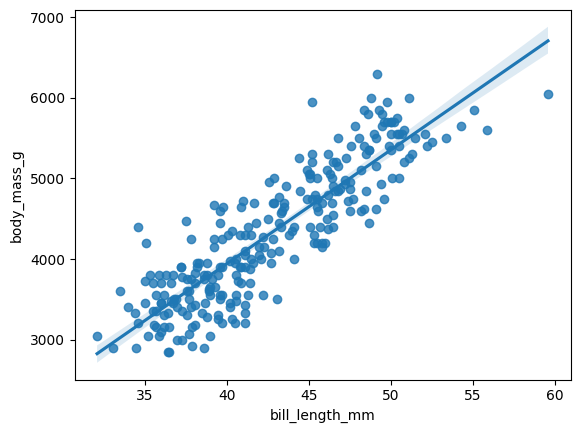

In [20]:
# plots to confirm the findings
sns.regplot( x= "bill_length_mm", y="body_mass_g", data= ols_data)

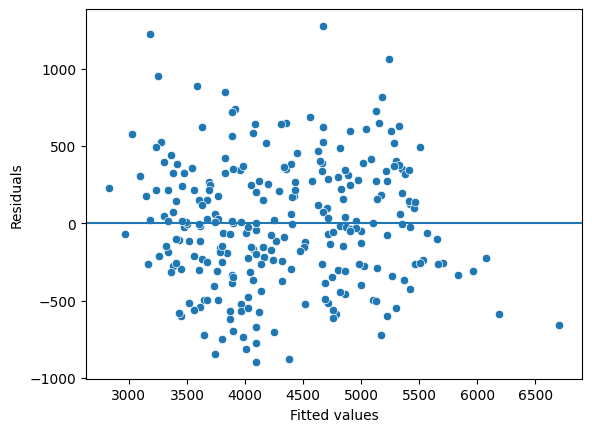

In [23]:
#This is a common plot encountered while working with simple linear regressions to check various assumptions

import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values,y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted values")
fig.set_ylabel("Residuals")
plt.show()

In [24]:
# the residuals look randomly spaced which means we can assume homoscedasticity

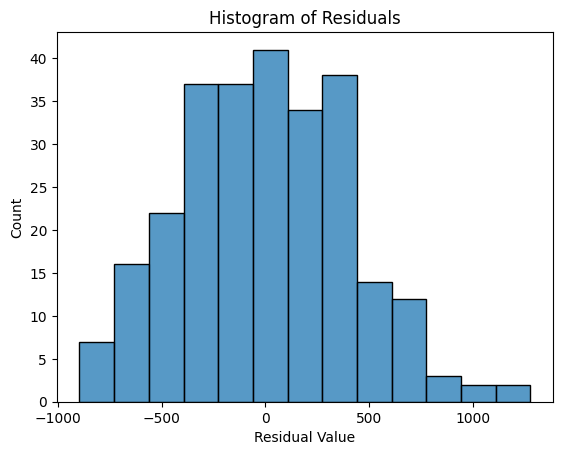

In [25]:
# lastly, a histogram of our residuals to determine if the residuals are normally distributed

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

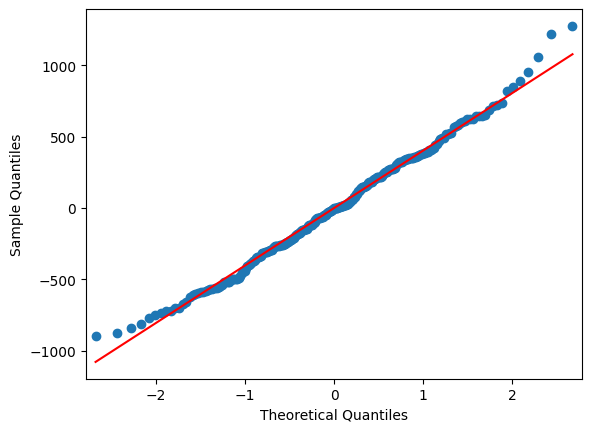

In [28]:
# the residuals are a bit skewed in the histogram so we can use a qq plot to confirm normality

import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()


In [29]:
# A straight diagonal line with slight curvature on the extremes